# Observations and Insights

 1. Capomulin and Ramicane both have the lowest average tumor size (40.68 and 40.22 respectivley) with a median that is slightly higher (41.56 and 40.67 respectively) then the mean. This means that both samples are slightly skewed to the left.
 2. Naftisol and Stelasyn both have an average tumor size (54.33 and 54.23 respectively) that is higher then the placebo (54.03) We can therefore infer that the drug regiments likely do not affect tumor size. 
 3. The regression for weight and tumor volume for the Capomulin drug regimen has a correlation coefficient of .71. This correlation coefficiant represents a strong positive relationship so we can conclude that as weight increases, our tumor volume for the Capolumin drug regimen will also increase. 
 4. The equation for regression line that fits weight and tumor volume for the Capomulin Regimen is 'y=.95x+21.55.' Based on the equation we can predict that a mouse who weighs 30 g will have a tumor volume of 50.05 mm3. 

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
complete_data_df = complete_data_df.sort_values("Drug Regimen")

complete_data_df.to_csv("Data/Complete_data.csv")
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = complete_data_df.groupby("Drug Regimen")


mean_tum_vol = drug_reg["Tumor Volume (mm3)"].mean()
median_tum_vol = drug_reg["Tumor Volume (mm3)"].median()
var_tum_vol = drug_reg["Tumor Volume (mm3)"].var()
std_tum_vol = drug_reg["Tumor Volume (mm3)"].std()
sem_tum_vol = drug_reg["Tumor Volume (mm3)"].sem()

summary_stats_tumor_vol_by_reg_df = pd.DataFrame({"Mean":mean_tum_vol,
                                                 "Median":median_tum_vol,
                                                 "Variance":var_tum_vol,
                                                 "Standard Deviation": std_tum_vol,
                                                 "Standard Error of Means":sem_tum_vol
                                                 })
summary_stats_tumor_vol_by_reg_df = summary_stats_tumor_vol_by_reg_df.reset_index()
summary_stats_tumor_vol_by_reg_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,Standard Error of Means
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

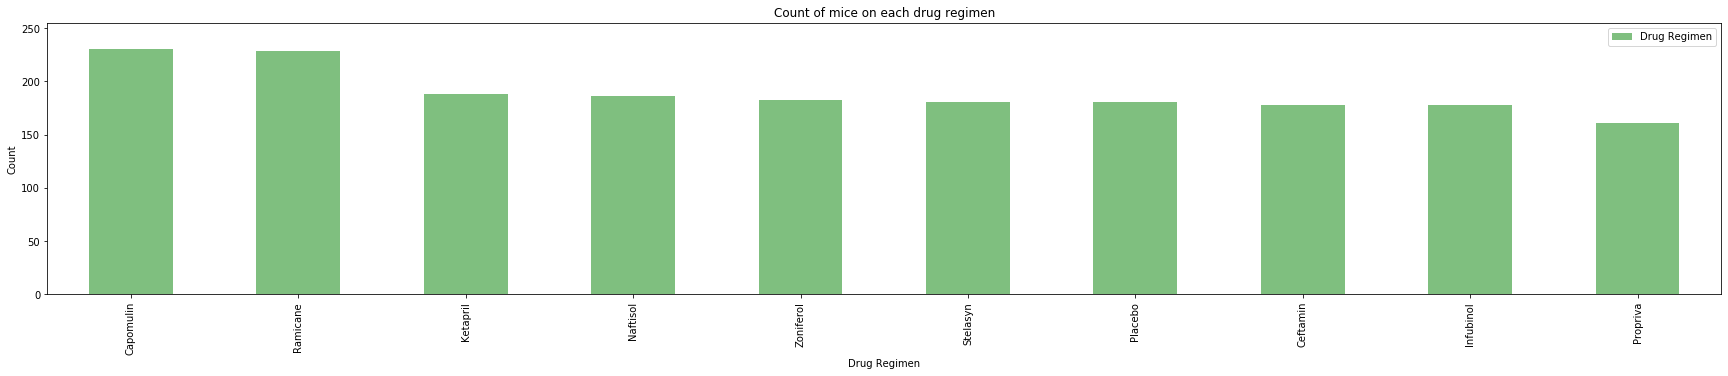

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using panda
y_axis = pd.DataFrame(complete_data_df["Drug Regimen"].value_counts())
y_axis.plot(kind="bar", figsize=(30,5),color='green',alpha=.5,title="Count of mice on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xlim(len(y_axis)-10.5,len(y_axis)-.5)
plt.ylim(0,max(y_axis["Drug Regimen"])+25)

plt.show()


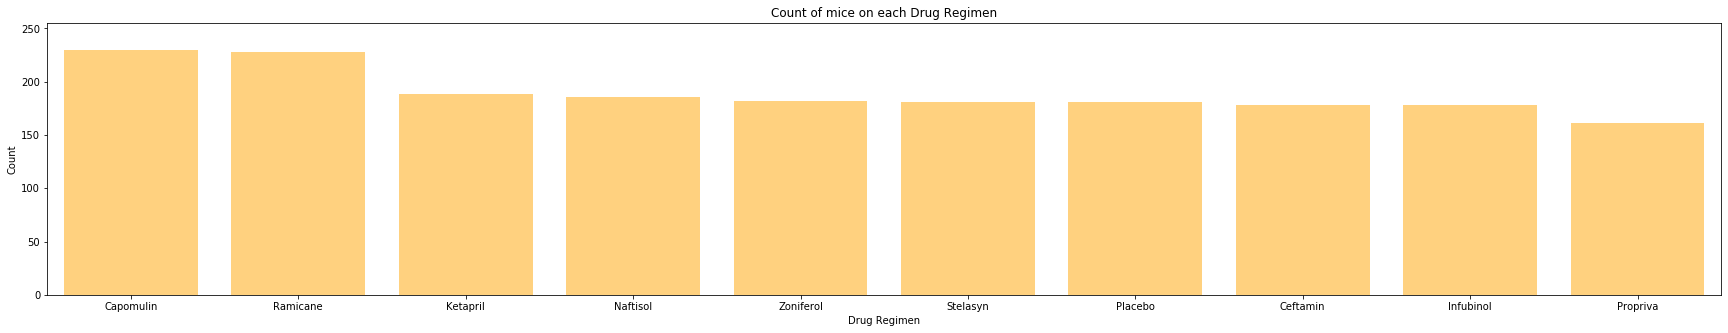

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data = complete_data_df["Drug Regimen"]
y_axis = data.value_counts()
x_axis = y_axis.index
plt.figure(figsize=(30,5))
plt.bar(x_axis,y_axis,color='orange',alpha=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Count of mice on each Drug Regimen")
plt.xlim(len(x_axis)-10.5,len(x_axis)-.5)
plt.ylim(0,max(y_axis)+25)
plt.show()

## Pie plots

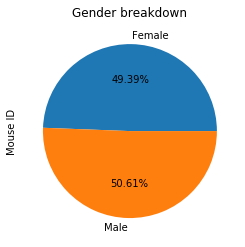

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = complete_data_df.groupby("Sex").count()
gender = gender["Mouse ID"]
gender.plot(kind="pie",title="Gender breakdown",autopct="%.2f%%")
plt.show()


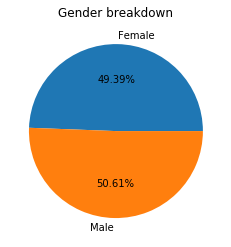

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = complete_data_df.loc[complete_data_df["Sex"]=="Male"]
male_count = (male["Sex"]).count()

female = complete_data_df.loc[complete_data_df["Sex"]=="Female"]
female_count = (female["Sex"]).count()

gender_count = [female_count,male_count]

labels = ["Female","Male"]

plt.pie(gender_count,labels=labels,autopct="%.2f%%")
plt.title("Gender breakdown")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
sorted_by_promise_df = complete_data_df.sort_values("Tumor Volume (mm3)",ascending=True)
sorted_by_promise_array = sorted_by_promise_df["Drug Regimen"].unique()

#Creating dataframes for each of the four most promising drug regimens
Ramicane_one = complete_data_df.loc[complete_data_df["Drug Regimen"] == sorted_by_promise_array[0]]
Capomulin_two = complete_data_df.loc[complete_data_df["Drug Regimen"] == sorted_by_promise_array[1]]
Infubinol_three = complete_data_df.loc[complete_data_df["Drug Regimen"] == sorted_by_promise_array[2]]
Ceftamin_four = complete_data_df.loc[complete_data_df["Drug Regimen"] == sorted_by_promise_array[-1]]

#Calculating final tumor volume of each mouse across the four most promising drug regimens
Ramicane_max_timepoint_by_mouse = Ramicane_one.loc[Ramicane_one.groupby("Mouse ID").Timepoint.idxmax()]
Capomulin_max_timepoint_by_mouse = Capomulin_two.loc[Capomulin_two.groupby("Mouse ID").Timepoint.idxmax()]
Infubinol_max_timepoint_by_mouse = Infubinol_three.loc[Infubinol_three.groupby("Mouse ID").Timepoint.idxmax()]
Ceftamin_max_timepoint_by_mouse = Ceftamin_four.loc[Ceftamin_four.groupby("Mouse ID").Timepoint.idxmax()]


#Ramicane IQR stats
quartiles = Ramicane_max_timepoint_by_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Ramicane Drug Regimen and Tumor Volume (mm3)")
print("--------------------------------------------")
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("--------------------------------------------")

#Capomulin IQR stats
quartiles = Capomulin_max_timepoint_by_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Capomulin Drug Regimen and Tumor Volume (mm3)")
print("--------------------------------------------")
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("--------------------------------------------")

#Infubinol IQR stats
quartiles = Infubinol_max_timepoint_by_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Infubinol Drug Regimen and Tumor Volume (mm3)")
print("--------------------------------------------")
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("--------------------------------------------")

#Ceftamin IQR stats
quartiles = Ceftamin_max_timepoint_by_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Ceftamin Drug Regimen and Tumor Volume (mm3)")
print("--------------------------------------------")
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("--------------------------------------------")


Ramicane Drug Regimen and Tumor Volume (mm3)
--------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------------------------
Capomulin Drug Regimen and Tumor Volume (mm3)
--------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------------
Infubinol Drug Regimen and Tumor Volume (mm3)
--------------------------------------------
The lower quartile of Infubinol is: 54.04860769

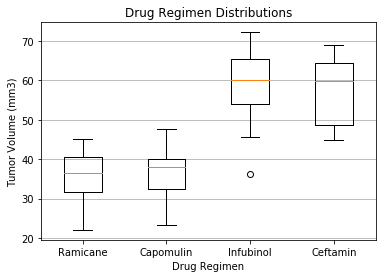

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen = ["Ramicane","Capomulin","Infubinol","Ceftamin"]
data = [Ramicane_max_timepoint_by_mouse["Tumor Volume (mm3)"],Capomulin_max_timepoint_by_mouse["Tumor Volume (mm3)"],Infubinol_max_timepoint_by_mouse["Tumor Volume (mm3)"],Ceftamin_max_timepoint_by_mouse["Tumor Volume (mm3)"]]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(regimen)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Drug Regimen Distributions")
ax.set_xlim(len(regimen)-3.5,len(regimen)+.5)
ax.grid(axis="y")
plt.show()


## Line and scatter plots

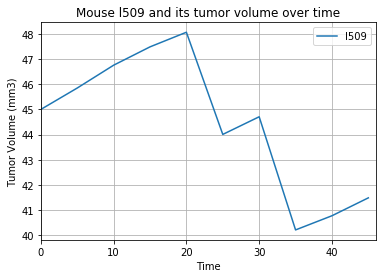

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = "l509"
drug = "Capomulin"

cap_by_ID  = Capomulin_two.set_index("Mouse ID")
one_mouse_cap_drug = cap_by_ID.loc[mouse_id,:]
one_mouse_cap_drug
x_time = one_mouse_cap_drug["Timepoint"]
y_tumor_vol = one_mouse_cap_drug["Tumor Volume (mm3)"]

plt.plot(x_time,y_tumor_vol,label=mouse_id)
plt.title(f'Mouse {mouse_id} and its tumor volume over time')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")
plt.xlim(min(x_time),max(x_time)+1)
plt.legend([mouse_id])
plt.grid()
plt.show()

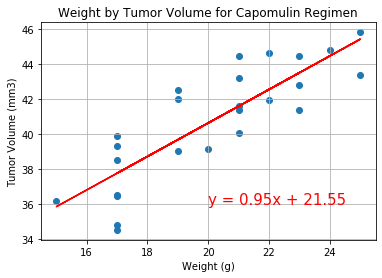

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_two 
weight_tumor_Cap_by_Mouse = Capomulin_two.groupby("Mouse ID").mean()
weight_tumor_Cap_by_Mouse
x_values = weight_tumor_Cap_by_Mouse["Weight (g)"]
y_values = weight_tumor_Cap_by_Mouse["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)
plt.plot(x_values,pred_y,"r-")
plt.annotate(regres_model,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight by Tumor Volume for Capomulin Regimen")
plt.grid()
plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Linear Regression Model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
pred_y = x_values * slope + intercept
regres_model = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Correlation Coefficiant
correl_coeff = rvalue**2
correl_coeff



0.7088568047708727